[Veri Kümesi Kaynak Adresi](https://ieee-dataport.org/documents/cyber-security-modbus-ics-dataset)

Bu Veri Kümesinde TCP haberleşmesinde ki ataklar yer almaktadır. Aşağıda Status sütununda ki atak türleri verilmiştir.
0.  Normal
1.  MITM
2.  QueryFlooding
3.  Ping Flood DDoS
4.  TCP SYN Flood DDos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # gereksiz uyarıları da kapatalım
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CPS/Modbus RTU SCADA/VeriKümesiYeni/NewModBusTestDataSet_Buyuk.csv')

In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True) # gereksiz bir sütun oluştu onu sildik
df.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,49499,502,17241,1212789,11490,723954,5751,488835,0.000000e+00,1.799593e+09,3.218302e+16,2.173092e+14,0
1,502,51801,24,1440,12,720,12,720,3.192345e+07,1.650023e+09,3.490861e+14,3.490861e+14,0
2,52515,502,6,360,2,120,4,240,5.058220e-01,2.027600e-02,4.734662e+15,9.469323e+15,0
3,52516,502,25,1506,17,1020,8,486,1.956025e+06,1.470137e+16,5.550503e+15,2.644651e+16,0
4,52517,502,25,1506,17,1020,8,486,4.856039e+06,1.470166e+16,5.550394e+15,2.644599e+16,0


In [ ]:
df = df.reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224826 entries, 0 to 224825
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          224826 non-null  int64  
 1   Port A         224826 non-null  int64  
 2   Port B         224826 non-null  int64  
 3   Packets        224826 non-null  int64  
 4   Bytes          224826 non-null  int64  
 5   Packets A → B  224826 non-null  int64  
 6   Bytes A → B    224826 non-null  int64  
 7   Packets B → A  224826 non-null  int64  
 8   Bytes B → A    224826 non-null  int64  
 9   Rel Start      224826 non-null  float64
 10  Duration       224826 non-null  float64
 11  Bits/s A → B   224826 non-null  float64
 12  Bits/s B → A   224826 non-null  float64
 13  Status         224826 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 24.0 MB


In [ ]:
del df['index']
df.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,49499,502,17241,1212789,11490,723954,5751,488835,0.000000e+00,1.799593e+09,3.218302e+16,2.173092e+14,0
1,502,51801,24,1440,12,720,12,720,3.192345e+07,1.650023e+09,3.490861e+14,3.490861e+14,0
2,52515,502,6,360,2,120,4,240,5.058220e-01,2.027600e-02,4.734662e+15,9.469323e+15,0
3,52516,502,25,1506,17,1020,8,486,1.956025e+06,1.470137e+16,5.550503e+15,2.644651e+16,0
4,52517,502,25,1506,17,1020,8,486,4.856039e+06,1.470166e+16,5.550394e+15,2.644599e+16,0


In [ ]:
df_min_max_scaled = df.copy()

sutunListe = df_min_max_scaled.columns.values.tolist() # sütun listesini aldık ve bir liste yaptık
sutunListe.pop() #son sütun Target listeden sildik zaten 0 ve 1 değerleri var
for sutun in sutunListe:
  df_min_max_scaled[sutun] = (df_min_max_scaled[sutun] - df_min_max_scaled[sutun].min()) / (df_min_max_scaled[sutun].max() - df_min_max_scaled[sutun].min())

In [ ]:
df_min_max_scaled.head()

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A,Status
0,0.756359,0.008385,0.043991,0.043986,0.044006,0.044002,0.043960,0.043961,0.000000e+00,2.569858e-08,0.394654,0.002658,0
1,0.007353,0.865225,0.000059,0.000050,0.000042,0.000040,0.000092,0.000065,4.799358e-10,2.356269e-08,0.004281,0.004269,0
2,0.802464,0.008385,0.000013,0.000011,0.000004,0.000004,0.000031,0.000022,7.604507e-18,2.895457e-19,0.058060,0.115804,0
3,0.802480,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,2.940680e-11,2.099388e-01,0.068065,0.323423,0
4,0.802495,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,7.300549e-11,2.099429e-01,0.068063,0.323417,0


In [ ]:
#veri kümemizi eğitim ve test olarak bölelim
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

X_train = df_min_max_scaled.drop(labels = "Status", axis = 1)
y_train = df_min_max_scaled["Status"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 59)
print("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(y_train))
print("Y test: ", len(y_test))

X train:  179860
X test:  44966
Y train:  179860
Y test:  44966


In [ ]:
X_train

,Port A,Port B,Packets,Bytes,Packets A → B,Bytes A → B,Packets B → A,Bytes B → A,Rel Start,Duration,Bits/s A → B,Bits/s B → A
62022,0.784227,0.008385,0.000010,0.000009,0.000008,0.000009,0.000015,0.000011,1.285722e-08,4.653495e-19,0.060210,0.036027
95685,0.767182,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,1.095641e-07,2.099331e-01,0.068067,0.323432
204128,0.783417,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,2.896692e-07,2.099352e-01,0.006807,0.323429
92217,0.772945,0.008385,0.000069,0.000059,0.000054,0.000051,0.000099,0.000070,1.269280e-08,2.083204e-01,0.060524,0.052311
104757,0.906002,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,1.799666e-07,2.099335e-02,0.680664,0.032343
...,...,...,...,...,...,...,...,...,...,...,...,...
140651,0.149168,0.008385,0.000000,0.000004,0.000000,0.000007,0.000000,0.000000,1.095751e-09,0.000000e+00,0.000000,0.000000
131735,0.787009,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,9.013624e-08,2.085052e-02,0.685327,0.003256
144589,0.501819,0.008385,0.000000,0.000004,0.000000,0.000007,0.000000,0.000000,2.831217e-08,0.000000e+00,0.000000,0.000000
220588,0.769001,0.008385,0.000061,0.000052,0.000061,0.000058,0.000061,0.000044,3.234080e-08,2.099402e-01,0.068064,0.032342


In [ ]:
y_train

62022     2
95685     3
204128    3
92217     2
104757    3
         ..
140651    4
131735    4
144589    4
220588    1
102577    3
Name: Status, Length: 179860, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix

ML_Name = []
ML_Acc = []

In [ ]:
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 12, criterion="entropy").fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

accuracy = dtree_model.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmDTC = confusion_matrix(y_test, dtree_predictions)

Doğruluk0.7821687497220122


In [ ]:
ML_Name.append("Decision Tree")
ML_Acc.append(accuracy)
cmDTC

array([[ 1571,   187,     1,   115,     0],
       [    1,  5198,   160,  1272,   334],
       [   41,   508, 10907,   851,   130],
       [   29,  2122,  1055,  8500,   348],
       [    2,  1364,    78,  1197,  8995]])

In [ ]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cmKNN = confusion_matrix(y_test, knn_predictions)

Doğruluk0.720366499132678


In [ ]:
ML_Name.append("K Neighbors")
ML_Acc.append(accuracy)
cmKNN

array([[ 1275,   190,   231,   166,    12],
       [    3,  4815,    93,  1785,   269],
       [  202,   578, 10054,  1556,    47],
       [   78,  3080,  1087,  7500,   309],
       [    1,  1836,    31,  1020,  8748]])

In [ ]:
# training a linear SVC classifier
from sklearn.svm import SVC
#######svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test 
accuracy = svm_model_linear.score(X_test, y_test)
print("Doğruluk" + str(accuracy))

# creating a confusion matrix
cmSVM = confusion_matrix(y_test, svm_predictions)

In [ ]:
ML_Name.append("SVM")
ML_Acc.append(accuracy)
cmSVM

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmNB = confusion_matrix(y_test, gnb_predictions)

Doğruluk0.5051372147845038


In [ ]:
ML_Name.append("Gaussian NB")
ML_Acc.append(accuracy)
cmNB

array([[   11,    23,  1835,     0,     5],
       [    2,   556,  6405,     1,     1],
       [    3,   108, 11208,    29,  1089],
       [    1,   402,  8205,  2479,   967],
       [    0,   199,  2977,     0,  8460]])

In [ ]:
#Quadratic Discriminant Analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
clf_predictions = clf.predict(X_test)

# accuracy on X_test
accuracy = clf.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmQDA = confusion_matrix(y_test, clf_predictions)

Doğruluk0.46708624293910955


In [ ]:
ML_Name.append("QDA")
ML_Acc.append(accuracy)
cmQDA

array([[  555,   113,   593,     0,   613],
       [  414,  2381,  1955,     0,  2215],
       [  779,   290, 10342,     1,  1025],
       [ 1018,  2092,  6023,   394,  2527],
       [  136,  1142,  3027,     0,  7331]])

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=25, random_state=0).fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmRFC = confusion_matrix(y_test, rfc_predictions)

Doğruluk0.798403238002046


In [23]:
ML_Name.append("Random Forest")
ML_Acc.append(accuracy)
cmRFC

array([[ 1534,   200,    14,   119,     7],
       [    1,  5213,    91,  1514,   146],
       [   34,   387, 10472,  1494,    50],
       [   17,  1517,   563,  9723,   234],
       [    0,   911,    25,  1741,  8959]])

In [24]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(X_train, y_train)
abc_predictions = abc.predict(X_test)

# accuracy on X_test
accuracy = abc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmABC = confusion_matrix(y_test, abc_predictions)

Doğruluk0.4581016768224881


In [25]:
ML_Name.append("Ada Boost")
ML_Acc.append(accuracy)
cmABC

array([[  340,   109,  1202,   206,    17],
       [ 1163,  2540,  1942,   348,   972],
       [    6,   203, 11869,   149,   210],
       [ 1117,   776,  4043,  4654,  1464],
       [  419,   358,   909,  8754,  1196]])

In [26]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
mnb_predictions = mnb.predict(X_test)

# accuracy on X_test
accuracy = mnb.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmMNB = confusion_matrix(y_test, mnb_predictions)

Doğruluk0.3400346928790642


In [27]:
ML_Name.append("Multinomial NB")
ML_Acc.append(accuracy)
cmMNB

array([[   0,    0, 1130,    0,  744],
       [   0,    0, 5389,  283, 1293],
       [   0,    0, 9637,  208, 2592],
       [   0,    1, 6519, 1318, 4216],
       [   0,    0, 4161, 3140, 4335]])

In [28]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)
sgd_predictions = sgd.predict(X_test)

# accuracy on X_test
accuracy = sgd.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmSGD = confusion_matrix(y_test, sgd_predictions)

Doğruluk0.45100742783436376


In [29]:
ML_Name.append("SGD")
ML_Acc.append(accuracy)
cmSGD

array([[1565,   14,    7,  283,    5],
       [   0,  270,  153, 6395,  147],
       [1521,  409,  602, 6491, 3414],
       [ 653,  287,  761, 9302, 1051],
       [   0,  134,   58, 2903, 8541]])

In [30]:
New_ML_Acc = [i * 100 for i in ML_Acc]

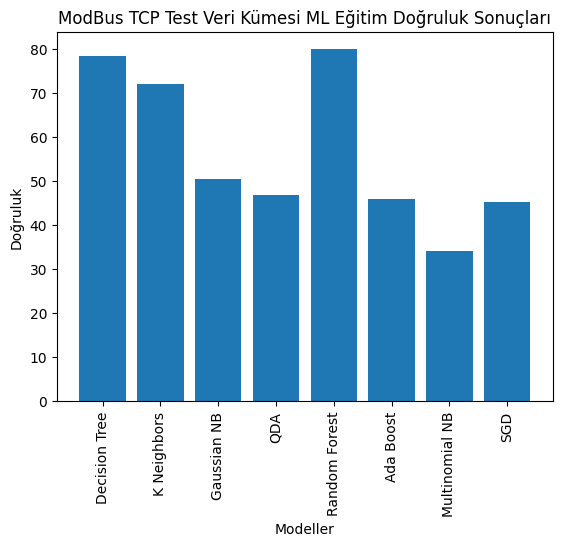

In [31]:
plt.title("ModBus TCP Test Veri Kümesi ML Eğitim Doğruluk Sonuçları")
plt.xlabel("Modeller")
plt.ylabel("Doğruluk")
plt.xticks(rotation = 90)

plt.bar(ML_Name,New_ML_Acc)

plt.show()

MITM Alternatif eğitim

In [32]:
df_min_max_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224826 entries, 0 to 224825
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Port A         224826 non-null  float64
 1   Port B         224826 non-null  float64
 2   Packets        224826 non-null  float64
 3   Bytes          224826 non-null  float64
 4   Packets A → B  224826 non-null  float64
 5   Bytes A → B    224826 non-null  float64
 6   Packets B → A  224826 non-null  float64
 7   Bytes B → A    224826 non-null  float64
 8   Rel Start      224826 non-null  float64
 9   Duration       224826 non-null  float64
 10  Bits/s A → B   224826 non-null  float64
 11  Bits/s B → A   224826 non-null  float64
 12  Status         224826 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 22.3 MB


In [34]:
df[(df['Status'] == 0) | (df['Status'] == 1)].count()

Port A           44137
Port B           44137
Packets          44137
Bytes            44137
Packets A → B    44137
Bytes A → B      44137
Packets B → A    44137
Bytes B → A      44137
Rel Start        44137
Duration         44137
Bits/s A → B     44137
Bits/s B → A     44137
Status           44137
dtype: int64

In [35]:
df_mitm = df[(df['Status'] == 0) | (df['Status'] == 1)].copy()

In [36]:
df_mitm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44137 entries, 0 to 224825
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Port A         44137 non-null  int64  
 1   Port B         44137 non-null  int64  
 2   Packets        44137 non-null  int64  
 3   Bytes          44137 non-null  int64  
 4   Packets A → B  44137 non-null  int64  
 5   Bytes A → B    44137 non-null  int64  
 6   Packets B → A  44137 non-null  int64  
 7   Bytes B → A    44137 non-null  int64  
 8   Rel Start      44137 non-null  float64
 9   Duration       44137 non-null  float64
 10  Bits/s A → B   44137 non-null  float64
 11  Bits/s B → A   44137 non-null  float64
 12  Status         44137 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 4.7 MB


In [38]:
X_train = df_mitm.drop(labels = "Status", axis = 1)
y_train = df_mitm["Status"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 59)
print("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(y_train))
print("Y test: ", len(y_test))

X train:  35309
X test:  8828
Y train:  35309
Y test:  8828


In [39]:
dtree_model = DecisionTreeClassifier(max_depth = 12, criterion="entropy").fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

accuracy = dtree_model.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmDTC = confusion_matrix(y_test, dtree_predictions)

Doğruluk0.9972813774354327


In [40]:
cmDTC

array([[1849,   11],
       [  13, 6955]])

In [41]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cmKNN = confusion_matrix(y_test, knn_predictions)

Doğruluk0.785455369279565


In [42]:
cmKNN

array([[ 127, 1733],
       [ 161, 6807]])

In [43]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=0).fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmRFC = confusion_matrix(y_test, rfc_predictions)

Doğruluk0.9952424105120072


In [44]:
cmRFC

array([[1827,   33],
       [   9, 6959]])

Query Flooding Alternatif Eğitim

In [45]:
df_QueryFlood = df[(df['Status'] == 0) | (df['Status'] == 2)].copy()
df_QueryFlood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70796 entries, 0 to 93167
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Port A         70796 non-null  int64  
 1   Port B         70796 non-null  int64  
 2   Packets        70796 non-null  int64  
 3   Bytes          70796 non-null  int64  
 4   Packets A → B  70796 non-null  int64  
 5   Bytes A → B    70796 non-null  int64  
 6   Packets B → A  70796 non-null  int64  
 7   Bytes B → A    70796 non-null  int64  
 8   Rel Start      70796 non-null  float64
 9   Duration       70796 non-null  float64
 10  Bits/s A → B   70796 non-null  float64
 11  Bits/s B → A   70796 non-null  float64
 12  Status         70796 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 7.6 MB


In [46]:
X_train = df_QueryFlood.drop(labels = "Status", axis = 1)
y_train = df_QueryFlood["Status"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 59)
print("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(y_train))
print("Y test: ", len(y_test))

X train:  56636
X test:  14160
Y train:  56636
Y test:  14160


In [48]:
dtree_model = DecisionTreeClassifier(max_depth = 12, criterion="entropy").fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

accuracy = dtree_model.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmDTC = confusion_matrix(y_test, dtree_predictions)

Doğruluk0.9982344632768362


In [49]:
cmDTC

array([[ 1905,    14],
       [   11, 12230]])

In [50]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cmKNN = confusion_matrix(y_test, knn_predictions)

Doğruluk0.9122881355932203


In [51]:
cmKNN 

array([[ 1023,   896],
       [  346, 11895]])

In [52]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=0).fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmRFC = confusion_matrix(y_test, rfc_predictions)

Doğruluk0.9973870056497175


In [53]:
cmRFC

array([[ 1904,    15],
       [   22, 12219]])

Ping Flood DDoS Alternatif eğitim

In [54]:
df_PingFloodDDoS = df[(df['Status'] == 0) | (df['Status'] == 3)].copy()
df_PingFloodDDoS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69732 entries, 0 to 212386
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Port A         69732 non-null  int64  
 1   Port B         69732 non-null  int64  
 2   Packets        69732 non-null  int64  
 3   Bytes          69732 non-null  int64  
 4   Packets A → B  69732 non-null  int64  
 5   Bytes A → B    69732 non-null  int64  
 6   Packets B → A  69732 non-null  int64  
 7   Bytes B → A    69732 non-null  int64  
 8   Rel Start      69732 non-null  float64
 9   Duration       69732 non-null  float64
 10  Bits/s A → B   69732 non-null  float64
 11  Bits/s B → A   69732 non-null  float64
 12  Status         69732 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 7.4 MB


In [55]:
X_train = df_PingFloodDDoS.drop(labels = "Status", axis = 1)
y_train = df_PingFloodDDoS["Status"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 59)
print("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(y_train))
print("Y test: ", len(y_test))

X train:  55785
X test:  13947
Y train:  55785
Y test:  13947


In [56]:
dtree_model = DecisionTreeClassifier(max_depth = 12, criterion="entropy").fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

accuracy = dtree_model.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmDTC = confusion_matrix(y_test, dtree_predictions)
########################################################
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cmKNN = confusion_matrix(y_test, knn_predictions)
###########################################################
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=0).fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmRFC = confusion_matrix(y_test, rfc_predictions)

Doğruluk0.9951243995124399
Doğruluk0.8842044884204489
Doğruluk0.9940488994048899


In [57]:
cmDTC

array([[ 1854,    52],
       [   16, 12025]])

In [58]:
cmKNN

array([[  715,  1191],
       [  424, 11617]])

In [59]:
cmRFC

array([[ 1852,    54],
       [   29, 12012]])

TCP SYN Flood DDoS Alternatif Eğitim

In [60]:
df_TCPSYNFloodDDoS = df[(df['Status'] == 0) | (df['Status'] == 4)].copy()
df_TCPSYNFloodDDoS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68139 entries, 0 to 175593
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Port A         68139 non-null  int64  
 1   Port B         68139 non-null  int64  
 2   Packets        68139 non-null  int64  
 3   Bytes          68139 non-null  int64  
 4   Packets A → B  68139 non-null  int64  
 5   Bytes A → B    68139 non-null  int64  
 6   Packets B → A  68139 non-null  int64  
 7   Bytes B → A    68139 non-null  int64  
 8   Rel Start      68139 non-null  float64
 9   Duration       68139 non-null  float64
 10  Bits/s A → B   68139 non-null  float64
 11  Bits/s B → A   68139 non-null  float64
 12  Status         68139 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 7.3 MB


In [61]:
X_train = df_TCPSYNFloodDDoS.drop(labels = "Status", axis = 1)
y_train = df_TCPSYNFloodDDoS["Status"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 59)
print("X train: ", len(X_train))
print("X test: ", len(X_test))
print("Y train: ", len(y_train))
print("Y test: ", len(y_test))

X train:  54511
X test:  13628
Y train:  54511
Y test:  13628


In [63]:
dtree_model = DecisionTreeClassifier(max_depth = 12, criterion="entropy").fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

accuracy = dtree_model.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmDTC = confusion_matrix(y_test, dtree_predictions)
########################################################
knn = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test)
cmKNN = confusion_matrix(y_test, knn_predictions)
###########################################################
rfc = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=0).fit(X_train, y_train)
rfc_predictions = rfc.predict(X_test)

# accuracy on X_test
accuracy = rfc.score(X_test, y_test)
print("Doğruluk" + str(accuracy)) 
 
# creating a confusion matrix
cmRFC = confusion_matrix(y_test, rfc_predictions)

Doğruluk0.9974317581449956
Doğruluk0.9066627531552686
Doğruluk0.996771353096566


In [64]:
cmDTC

array([[ 1873,     7],
       [   28, 11720]])

In [65]:
cmKNN

array([[  985,   895],
       [  377, 11371]])

In [66]:
cmRFC

array([[ 1855,    25],
       [   19, 11729]])